# ***Optical Absorption Spectra in Semiconductors***  
  
The transmittance of two samples of CdS with thicknesses of $60$ $nm$ and $110$ $nm$ were calculated with an spectrophotometer to calculate the absorption coefficient and the energy gap by the two samples method and the derivative method.  
  
The measurements were made from a wavelength of $380$ $nm$ to $1100$ $nm$. As the two samples of CdS were grown over glass substrate, firstly the light intensity of this sample was measured and will be called *reference intensity* $I_{0}$. Later, the same process was repeated with the CdS samples.  
  
***Note:*** All the measurements were processed by the $TracQ_{BASIC}$ software. With this software, the transmittance of both samples will be calculated, it will divide the light intensity that passes through the CdS sample by $I_{0}$.

## **Importing libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from derivative import dxdt
from scipy import constants
from scipy.stats import linregress

## **Loading data**

The measurements of both samples are in `Práctica No 2.txt`. To make their analysis easier, the data was separated into 2 files: `60nmcds.txt` for the sample of $60$ $nm$ and `110nmcds.txt` for the sample of $110$ $nm$ and then converted in one dataframe.

In [2]:
df_60 = pd.read_csv(
    "60nmcds.txt",
    sep="\t", header=None,
    names=["Wavelength (nm)", "Transmittance (%)"],
    skiprows=2
)

df_60.loc[:, "Sample"] = "60 nm"
df_60

,Wavelength (nm),Transmittance (%),Sample
0,380.016,24.30456,60 nm
1,382.007,24.98066,60 nm
2,383.998,25.62613,60 nm
3,385.988,26.22389,60 nm
4,388.014,26.80113,60 nm
...,...,...,...
356,1092.006,76.51353,60 nm
357,1094.003,76.57490,60 nm
358,1095.998,76.60664,60 nm
359,1097.989,76.52434,60 nm


In [3]:
df_110 = pd.read_csv(
    "110nmcds.txt", 
    sep="\t", header=None,
    names=["Wavelength (nm)", "Transmittance (%)"],
    skiprows=2
)

df_110.loc[:, "Sample"] = "110 nm"
df_110

,Wavelength (nm),Transmittance (%),Sample
0,380.016,14.55002,110 nm
1,382.007,15.02878,110 nm
2,383.998,15.49435,110 nm
3,385.988,15.93374,110 nm
4,388.014,16.35576,110 nm
...,...,...,...
356,1092.006,72.30723,110 nm
357,1094.003,72.34763,110 nm
358,1095.998,72.40607,110 nm
359,1097.989,72.33378,110 nm


In [4]:
df = pd.concat([df_60, df_110], ignore_index=False)
df

,Wavelength (nm),Transmittance (%),Sample
0,380.016,24.30456,60 nm
1,382.007,24.98066,60 nm
2,383.998,25.62613,60 nm
3,385.988,26.22389,60 nm
4,388.014,26.80113,60 nm
...,...,...,...
356,1092.006,72.30723,110 nm
357,1094.003,72.34763,110 nm
358,1095.998,72.40607,110 nm
359,1097.989,72.33378,110 nm


In [5]:
df.dtypes

Wavelength (nm)      float64
Transmittance (%)    float64
Sample                object
dtype: object

## **Transmittance Analysis**

### Using pandas to find maximum transmittances

The transmittance graphs are obtained in function of the wavelength for two samples of CdS of $60$ $nm$ and $110$ $nm$.  
  
In figure 1 the transmittance of both samples are shown.

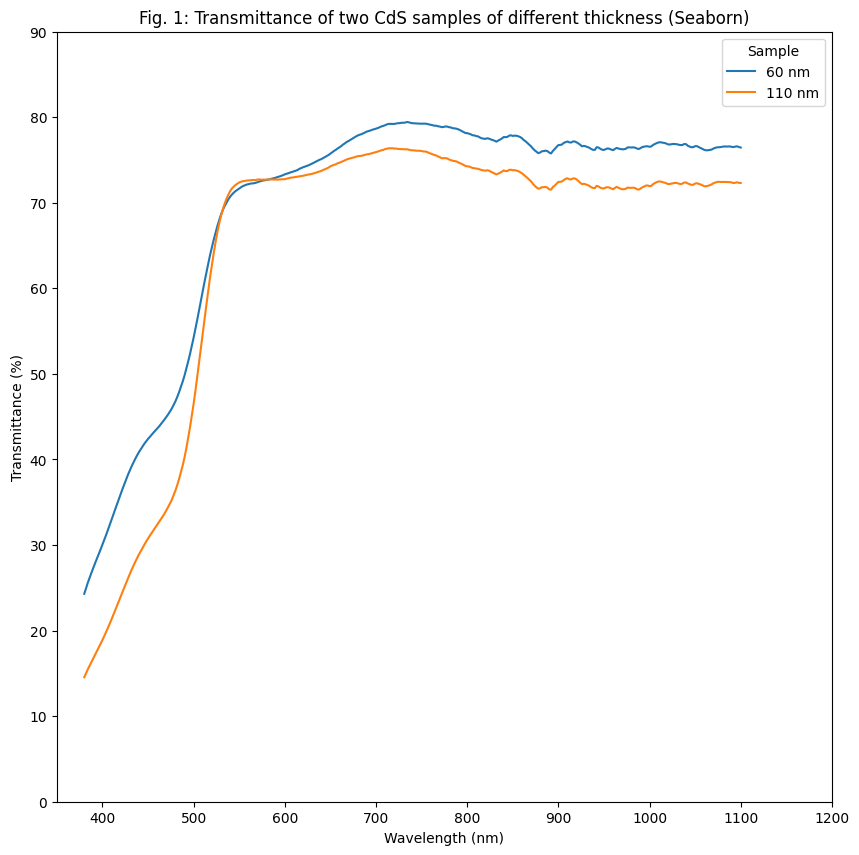

In [6]:
fig_1, ax = plt.subplots(figsize=(10, 10))
trans = sns.lineplot(
    data=df,
    x=df["Wavelength (nm)"],
    y=df["Transmittance (%)"],
    hue="Sample"
)

plt.xlim(350, 1200)
plt.ylim(0, 90)
plt.title("Fig. 1: Transmittance of two CdS samples of different thickness (Seaborn)")
plt.show()

Let's find the maximum transmittance for each CdS sample.

For the sample with thickness of $60$ $nm$:

In [7]:
maxtrans_60 = df_60.loc[df_60["Transmittance (%)"] == df_60["Transmittance (%)"].max()]

maxtrans_60

,Wavelength (nm),Transmittance (%),Sample
177,733.984,79.44486,60 nm


The maximum transmittance for the sample of $60$ $nm$ is of $79.44$% at a wavelength of $733.98$ $nm$.

For the sample with thickness of $110$ $nm$:

In [8]:
maxtrans_110 = df_110.loc[df_110["Transmittance (%)"] == df_110["Transmittance (%)"].max()]

maxtrans_110

,Wavelength (nm),Transmittance (%),Sample
169,717.99,76.38255,110 nm


The maximum transmittance for the sample of $110$ $nm$ is of $76.38$% at a wavelength of $717.99$ $nm$. 

### Using Plotly to locate maximum transmittances in a graph

In [9]:
fig_1_1 = px.line(
    df,
    x="Wavelength (nm)",
    y="Transmittance (%)",
    color="Sample",
    markers=True,
    title="Fig 1.1: Transmittance of two CdS samples of different thickness (Plotly)"
)

fig_1_1.update_layout(title_x=0.5)
fig_1_1.update_xaxes(linewidth=1, linecolor="black", mirror=True)
fig_1_1.update_yaxes(linewidth=1, linecolor="black", mirror=True)
fig_1_1.show()

We just have to zoom in the part of the graph where the transmittances are higher, i.e., from $700$ $nm$ to $800$ $nm$. From this, we can see that the maximum transmittance of the sample of $60$ $nm$ is at $733.98$ $nm$ with $79.44$% and for the sample of $110$ $nm$, is at $717.99$ with $76.48$%.

## **Calculating the energy gap**

### Two Samples Method

From the Lambert's Law we have the equation  
  
$I_{T} = I_{0}e^{\alpha d}$  
  
where $I_{0}$ is the incident light intensity and $I_{T}$ is the transmitted light intensity. It expresses the variation of light intensity when it passes through a sample of thickness $d$ and absorption coefficient $\alpha$.  
  
If we consider the reflected light in the surface of the sample, we will have:    
  
$I_{T} \thickapprox I_{0}(I-R)^{2}e^{-\alpha d}$  
  
Finding the absorption coefficient through the transmittance and reflectance of the sample:  
  
$\alpha = \frac{1}{d}[ln({(\frac{I_{0}}{I_{T}})\frac{1}{(1-R)^{2}}})]$  
  
If R is the same for two samples of thicknesses $d_{1}$ and $d_{2}$:

$\alpha = \frac{1}{d_{2}-d_{1}}ln(\frac{T_{1}}{T_{2}})$  
  

where $T_{1}$ and $T_{2}$ are the transmittances of the samples with thickness $d_{1}$ and $d_{2}$ respectively, which are measured if the reflectance of both samples are unkown.  
  
From the intercept for the x axis ($\alpha^{2} = 0$) of the graph of $\alpha^{2}$ in function of the photon energy, the energy gap can be calculated.

We will create a new dataframe for the absortion coefficient.

In [10]:
# Separating transmittances from df
trans_1 = df.loc[df["Sample"] == "60 nm"]["Transmittance (%)"]
trans_2 = df.loc[df["Sample"] == "110 nm"]["Transmittance (%)"]
trans_div = np.divide(trans_1, trans_2)

# Since the absorption coefficient will be given in cm^{-1},
# we will transform nm to cm (1 nm = 1E-7)
d1_cm = (60) * (1E-7)
d2_cm = (110) * (1E-7)

# Calculating absorption coefficients
abs_coef = ((1 / (d2_cm - d1_cm)) * (np.log(trans_div)))

# Obtaining energies from wavelengths (the same wavelengths were used in both samples)
wavelength = df.loc[df["Sample"] == "60 nm"]["Wavelength (nm)"]
# We must remeber that E=(hc)/lambda, where hc=1240 Ev*nm
energy = 1240 / wavelength

abs_data = {
    "Energy (eV)": energy,
    "Alpha (cm^-1)": abs_coef
}

df_abs = pd.DataFrame(abs_data)
df_abs

,Energy (eV),Alpha (cm^-1)
0,3.263021,102614.323775
1,3.246014,101626.979201
2,3.229183,100627.418541
3,3.212535,99646.390769
4,3.195761,98772.784385
...,...,...
356,1.135525,11308.692755
357,1.133452,11357.330339
358,1.131389,11278.724281
359,1.129337,11263.524039


We will use Plotly to identify in which points the graph of the absorption coefficient has a linear behaviour.

In [11]:
fig_2 = px.line(
    df_abs,
    x="Energy (eV)",
    y="Alpha (cm^-1)",
    markers=True,
    title="Fig. 2: Absorption coefficient in function of the energy for CdS obtained from two samples of different thickness"
)

fig_2.update_layout(title_x=0.5)
fig_2["data"][0]["showlegend"] = True
fig_2["data"][0]["name"] = "alpha(hv)"
fig_2.show()

As we can see, the absorption coefficient will vary from $2.33$ $eV$ or for wavelengths less than $532.18$ $nm$.

Considering the squared absorption coefficient and plotting again in function of the energy:

In [12]:
# Plotting squared absorption coefficient
df_abs["Alpha^2 (cm^-2)"] = df_abs["Alpha (cm^-1)"] ** 2
fig_3 = px.line(
    df_abs,
    x="Energy (eV)",
    y="Alpha^2 (cm^-2)",
    markers=True,
    title="Fig. 3: Squared absorption coefficient"
)

fig_3.update_layout(title_x=0.5)
fig_3["data"][0]["showlegend"] = True
fig_3["data"][0]["name"] = "alpha^2(hv)"
fig_3.show()

Now, we can see a linear behaviour from $2.37$ $eV$ or, in terms of wavelength, $523.30$ $nm$.

Adjusting the curve where the values of energy are greater or equal than $2.37$ $eV$ in Figure 3:

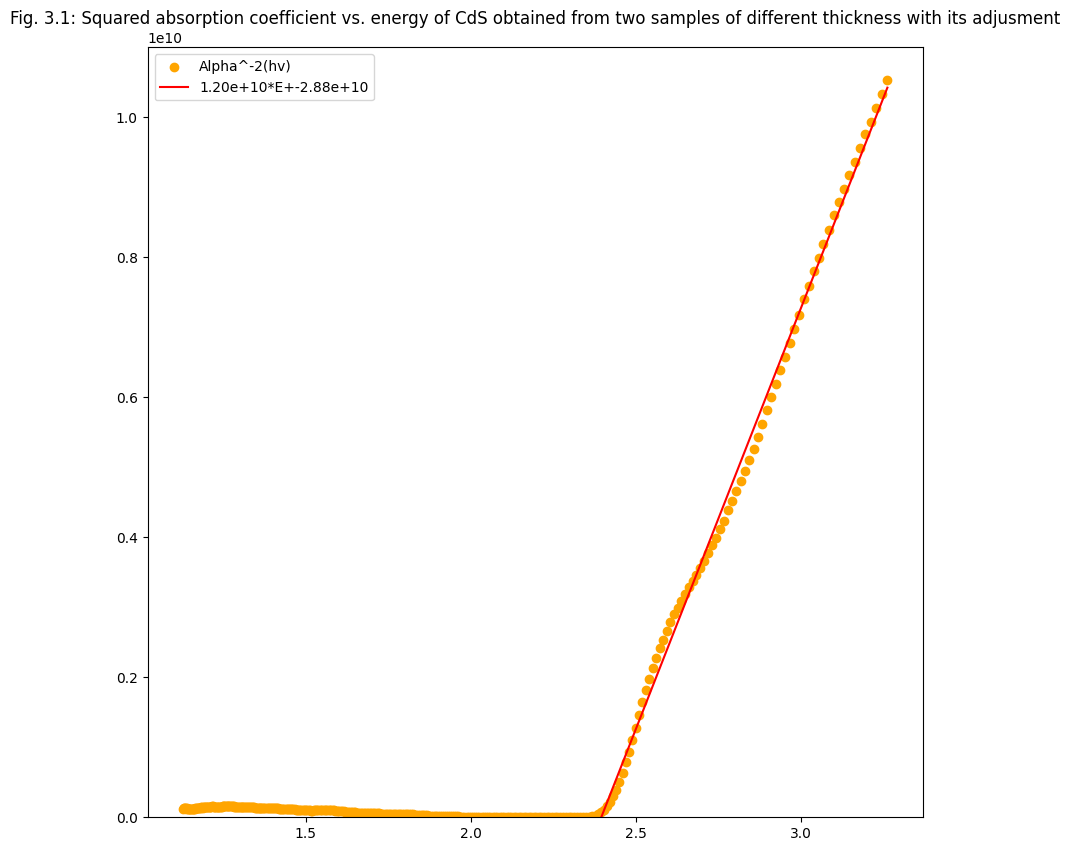

In [13]:
# Adjusting the curve to obtain the energy gap
slope, inter, r, p, se = linregress(
    x=df_abs[df_abs["Energy (eV)"] >= 2.375543]["Energy (eV)"],
    y=df_abs[df_abs["Energy (eV)"] >= 2.375543]["Alpha^2 (cm^-2)"]
)

fig_3_1, ax = plt.subplots(figsize=(10, 10))
ax.scatter(data=df_abs, x="Energy (eV)", y="Alpha^2 (cm^-2)", color="orange")
ax.plot(
    df_abs[df_abs["Energy (eV)"] >= 2.375543]["Energy (eV)"],
    slope*df_abs[df_abs["Energy (eV)"] >= 2.375543]["Energy (eV)"]+inter,
    color="red"
)

plt.title("Fig. 3.1: Squared absorption coefficient vs. energy of CdS obtained from two samples of different thickness with its adjusment")
plt.legend(["Alpha^-2(hv)", f"{'{:.2e}'.format(slope)}*E+{'{:.2e}'.format(inter)}"])
plt.ylim(0, 1.1E10)
plt.show()

It will be enough to make the adjustment equation equal to zero to find the energy gap. Doing this:

In [14]:
# Calculating energy gap
Eg = round(-inter / slope, 2)
print(f"E_g={Eg} eV")

E_g=2.4 eV


We obtain an energy gap of $E_{g}=2.4$ $eV$.

### Derivative Method

This method will be applied to the transmittances of the samples. When the transmittances don't vary enough in certain intervals of wavelength, the derivative $\frac{dT}{d\lambda}$ will be 0 approximately and it will be big when the transmittances have considerable variations in other intervals. In the maximum of $\frac{dT}{d\lambda}$ the value of the energy gap will be located.  
  
We will use numpy to perform this method. 

In [15]:
# Let's start by separating the samples
samples = df["Sample"].unique().tolist()

dT_dw = {}
for sample in samples:
    w = df[df["Sample"] == sample]["Wavelength (nm)"].to_numpy()
    t = df[df["Sample"] == sample]["Transmittance (%)"].to_numpy()
    dT_dw[sample] = np.diff(t, prepend=t[1]) / np.diff(w, prepend=w[1])

df["derivative (a.u.)"] = np.concatenate((dT_dw["60 nm"], dT_dw["110 nm"]))
df

,Wavelength (nm),Transmittance (%),Sample,derivative (a.u.)
0,380.016,24.30456,60 nm,0.339578
1,382.007,24.98066,60 nm,0.339578
2,383.998,25.62613,60 nm,0.324194
3,385.988,26.22389,60 nm,0.300382
4,388.014,26.80113,60 nm,0.284916
...,...,...,...,...
356,1092.006,72.30723,110 nm,-0.039170
357,1094.003,72.34763,110 nm,0.020230
358,1095.998,72.40607,110 nm,0.029293
359,1097.989,72.33378,110 nm,-0.036308


#### Using pandas to calculate the energy gaps

In [16]:
# For the sample of 60 nm
max_60 = df[df["Sample"] == "60 nm"]["derivative (a.u.)"].max()
max_wave60 = df.loc[df["derivative (a.u.)"] == max_60]
E_g_60 = round(float(1240 / max_wave60["Wavelength (nm)"]), 2)
print(f"For the sample of 60 nm we have an energy gap of E_g={E_g_60} eV.")

For the sample of 60 nm we have an energy gap of E_g=2.45 eV.


In [17]:
# For the sample of 110 nm
max_110 = df[df["Sample"] == "110 nm"]["derivative (a.u.)"].max()
max_wave110 = df.loc[df["derivative (a.u.)"] == max_110]
E_g_110 = round(float(1240 / max_wave110["Wavelength (nm)"]), 2)
print(f"For the sample of 110 nm we have an energy gap of E_g={E_g_110} eV.")

For the sample of 110 nm we have an energy gap of E_g=2.42 eV.


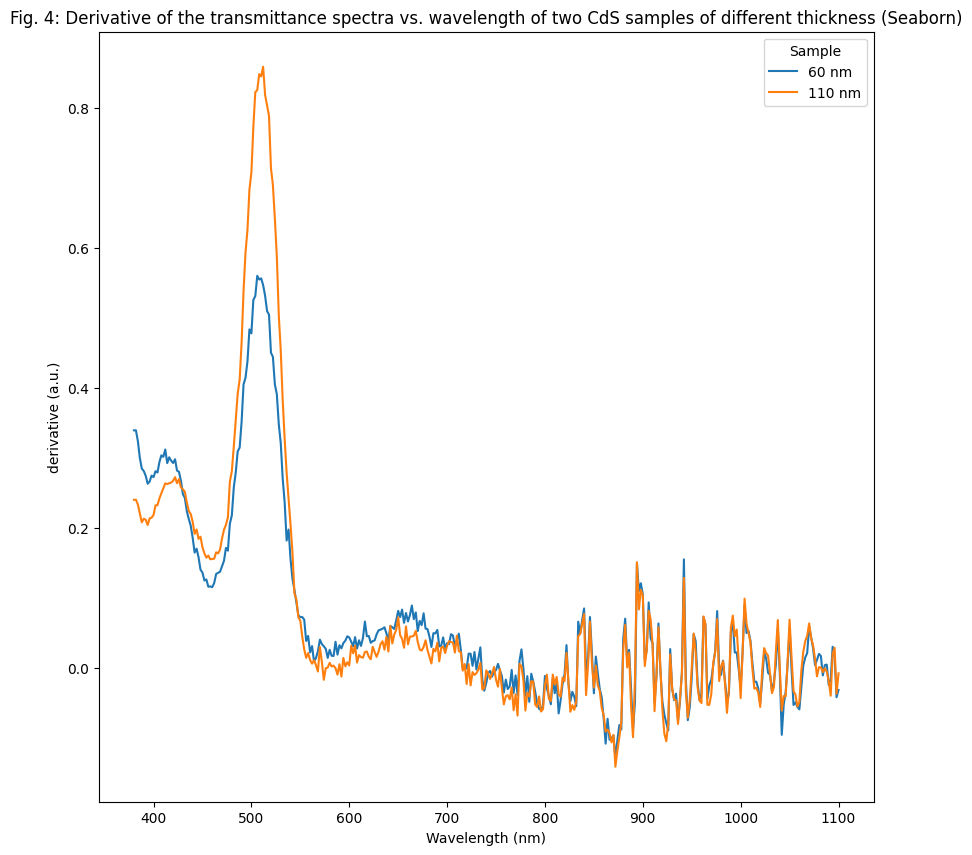

In [18]:
fig_4, ax = plt.subplots(figsize=(10, 10))
eng_p = sns.lineplot(
    data=df,
    x=df["Wavelength (nm)"],
    y=df["derivative (a.u.)"],
    hue="Sample"
)

plt.title("Fig. 4: Derivative of the transmittance spectra vs. wavelength of two CdS samples of different thickness (Seaborn)")
plt.show()

As we see in the graph, we can only take the interval that goes from $400$ $nm$ to $600$ $nm$.

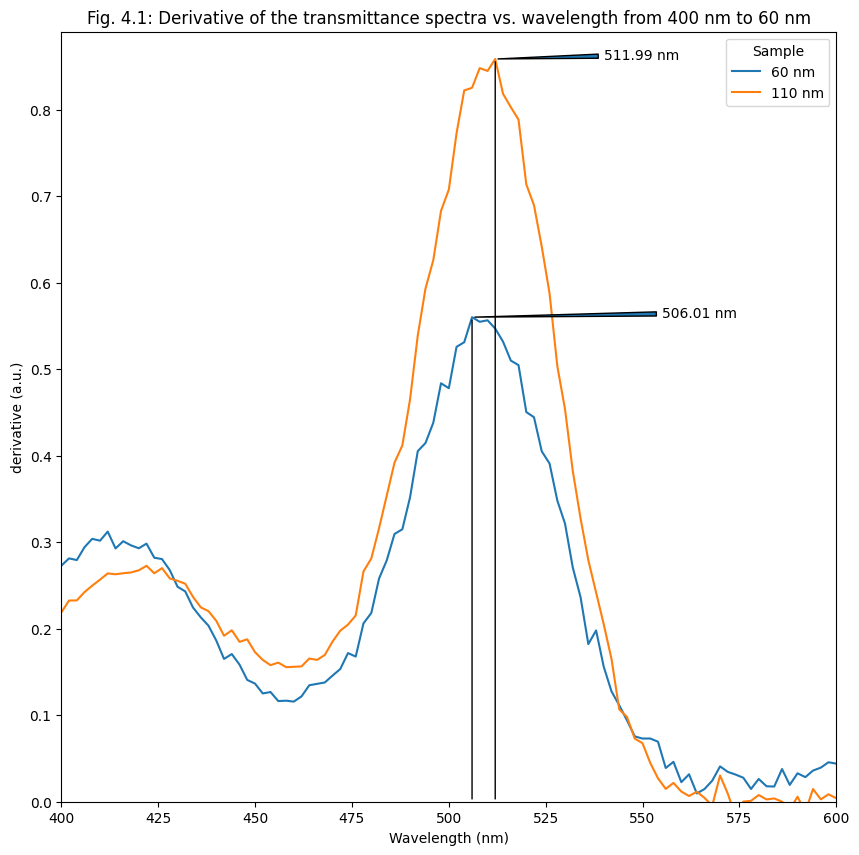

In [19]:
fig_4_1, ax = plt.subplots(figsize=(10, 10))
eng_p = sns.lineplot(
    data=df,
    x=df["Wavelength (nm)"],
    y=df["derivative (a.u.)"],
    hue="Sample"
)

# Locating the maximum of the sample of 60 nm
plt.annotate(
    "", xy=(max_wave60['Wavelength (nm)'], 0), xycoords="data",
    xytext=(max_wave60['Wavelength (nm)'], max_60), textcoords="data",
    arrowprops=dict(arrowstyle="-", connectionstyle="arc3,rad=0.")
)

plt.annotate(
    f"{round(float(max_wave60['Wavelength (nm)']), 2)} nm",
    xy=(max_wave60["Wavelength (nm)"], max_60),
    xycoords="data", xytext=(555, max_60), textcoords="data",
    arrowprops=dict(arrowstyle="wedge", connectionstyle="arc3,rad=0.")
)

# Locating the maximum of the sample of 110 nm
plt.annotate(
    "", xy=(max_wave110['Wavelength (nm)'], 0), xycoords="data",
    xytext=(max_wave110['Wavelength (nm)'], max_110), textcoords="data",
    arrowprops=dict(arrowstyle="-", connectionstyle="arc3,rad=0.")
)

plt.annotate(
    f"{round(float(max_wave110['Wavelength (nm)']), 2)} nm",
    xy=(max_wave110["Wavelength (nm)"], max_110),
    xycoords="data", xytext=(540, max_110), textcoords="data",
    arrowprops=dict(arrowstyle="wedge", connectionstyle="arc3,rad=0.")
)

# Modifying axes and title
plt.xlim(400, 600)
plt.ylim(0, 0.89)
plt.title("Fig. 4.1: Derivative of the transmittance spectra vs. wavelength from 400 nm to 60 nm")
plt.show()

We have an energy gap for the sample of $60$ $nm$ of $E_g=2.45$ $eV$ and $E_g=2.42$ $eV$ for the sample of $110$ $nm$.

#### Using Plotly to locate the energy gaps

In [20]:
fig_4_2 = px.line(
    df,
    x="Wavelength (nm)",
    y="derivative (a.u.)",
    color="Sample",
    markers=True,
    title="Fig. 4.2: Derivative of the transmittance spectra vs. wavelength for two CdS samples of different thickness (Plotly)"
)

fig_4_2.update_layout(title_x=0.5)
fig_4_2.update_xaxes(linewidth=1, linecolor="black", mirror=True)
fig_4_2.update_yaxes(linewidth=1, linecolor="black", mirror=True)
fig_4_2.show()

Looking at the region that goes from $400$ $nm$ to $600$ $nm$, we find that the maximum for the sample of $60$ $nm$ is at $506$ $nm$ and for the sample of $110$ $nm$ is at $511.98$ $nm$.  
  
Using the equation  
  
$E=\frac{hc}{\lambda}$  
  
to calculate the energy gaps, we obtain $E_{g}=2.45$ $eV$ for the sample of $60$ $nm$ and $E_{g}=2.42$ for the sample of $110$ $nm$.

## **Conclusion**

The transmittance spectra of both samples of CdS of different thickness measured with the spectrophotometer, are very similar, as they are made of the same semiconductor. The thickness will be a factor that will affect the transmittance. It is checked experimentally that the absoprtion coefficient varies when the energy gap is reached, having a greater absorption coefficient for shorter wavelengths, in this case, for wavelengths shorter than $514.52$ $nm$ for the CdS.  

The energy gap calculated with the derivative method is greater than the energy gaps calculated with the two samples method; nevertheless, both methods are very accurate. With the two samples method we obtain an energy gap of $2.42$ $eV$ and with the derivative method we obtained an energy gap of $2.45$ $eV$ for the sample of $60$ $nm$ and $2.42$ $eV$ for the sample of $110$ $nm$, this is the reason why the CdS is a very good smeicondctir material to be used in a solar cell.